<a href="https://colab.research.google.com/github/zazaferjancsik/Data-Analytics-Group-Project/blob/master/Assignment_1%20-%20Radost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import os
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

base='/content/drive/MyDrive/Python/mammographic_masses_data.csv'
print(base)


Mounted at /content/drive
/content/drive/MyDrive/Python/mammographic_masses_data.csv


In [11]:
mydata=pd.read_csv(base)
print(mydata)
df = pd.DataFrame(data=mydata)

mydata[["Age"]].describe()


df.loc[mydata['Severity']==1]

fig = px.histogram(mydata, x = "Age")
# fig.show()


      BA   Age  Shape  Margin  Density  Severity
0    5.0  67.0    3.0     5.0      3.0         1
1    4.0  43.0    1.0     1.0      NaN         1
2    5.0  58.0    4.0     5.0      3.0         1
3    4.0  28.0    1.0     1.0      3.0         0
4    5.0  74.0    1.0     5.0      NaN         1
..   ...   ...    ...     ...      ...       ...
956  4.0  47.0    2.0     1.0      3.0         0
957  4.0  56.0    4.0     5.0      3.0         1
958  4.0  64.0    4.0     5.0      3.0         0
959  5.0  66.0    4.0     5.0      3.0         1
960  4.0  62.0    3.0     3.0      3.0         0

[961 rows x 6 columns]


In [7]:
# Task 3

clean_df = df.dropna()
# print(clean_df.to_string())

clean_fig = px.histogram(clean_df, x = "Age")
# clean_fig.show()


Explained variance ratio: [0.49971794 0.16489231]


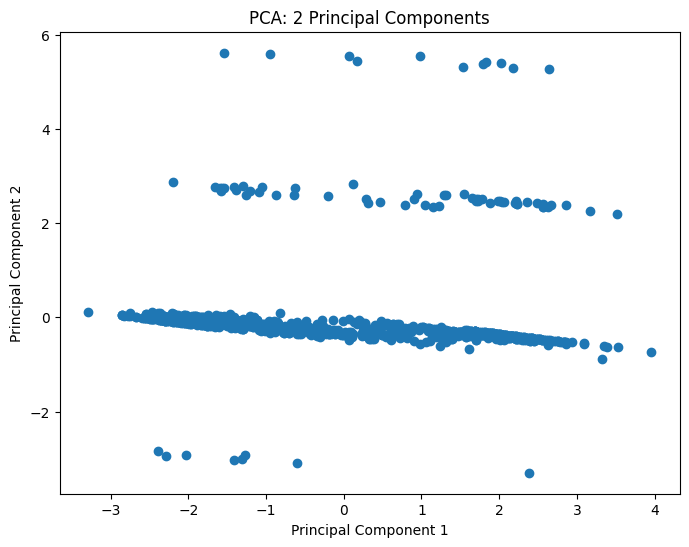

In [13]:
# Task 4
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clean_df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio (how much variance each PC explains)
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Visualize the reduced 2D data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()